<a href="https://colab.research.google.com/github/erikhhs/ads/blob/main/Proefstuderen/ML_penguins_antwoorden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welke soort pinguin is dit?
In dit notebook proberen we aan de hand van kenmerken van pinguins te voorspellen om welke pinguinsoort het gaat. 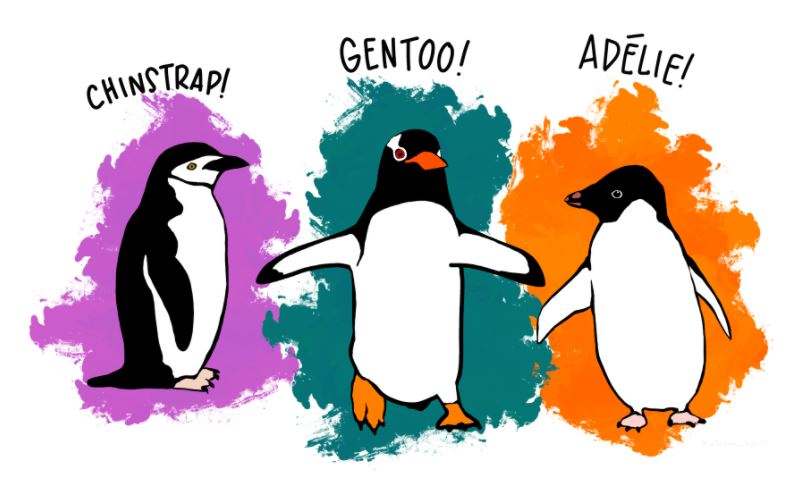

## Importeren toolset
- De tools die we gebruiken moeten we eerst importeren voordat we ze kunnen gebruiken.

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn import tree as tree_plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## 1. Laden van de penguins data set
- 6 kolommen met kenmerken van de pinguin
- 1 kolom waarin de soort (species) pinguin staat

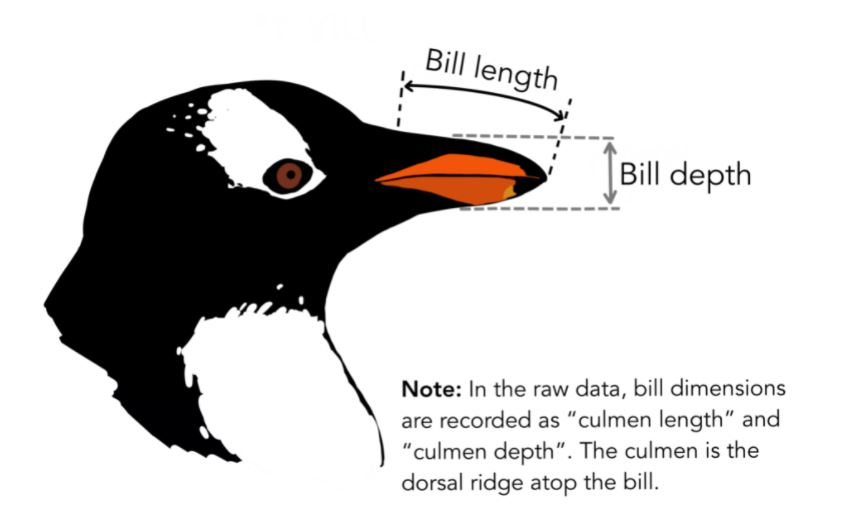

In [18]:
df=sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 1.1 Data
- We hebben te maken met twee soorten data, welke soorten zijn dat?
- Er ontbreekt ook data in sommige kolommen. Welke kolommen zijn dat

In [20]:
#numeriek (float) en labels / klassen / categorieen (object)
#de kolommen waarin het aantal non-null lager is dan 344

- In onderstaande cel verwijderen we alle regels waar NaN in staat.

In [21]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## 2.1 Analyse: aantal per soort
Voordat we gaan voorspellen, gaan we eerst de data analyseren. Voer onderstaande cel uit om bepalen hoeveel regels we per soort in de dataset hebben.

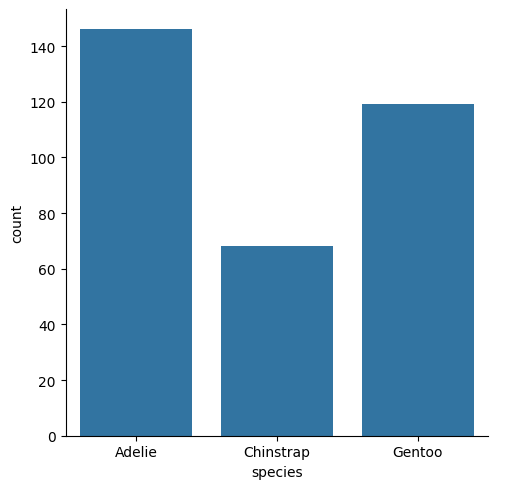

In [22]:
sns.catplot(kind = 'count', x = 'species', data=df)

## 2.2 Impact van numerieke kenmerken op soort

We willen nu een beeld vormen over welke kenmerken de meeste informatie geven over de soort van de pinguin. Is snavellengte ('bill_lenght_mm') bijvoorbeeld een goede voorspeller of hebben we juist meer aan de flipperlengte ('flipper_length_mm')?
- Gebruik pen en papier om een grafiek te ontwerpen waarmee je eenvoudig kunt zien in hoeverre de snavellengte per soort verschilt.

- Pas de code in onderstaande cel aan, zodat je kunt zien wat de gemiddelde kenmerkwaardes per soort zijn.
- Doe dit voor de volgende kenmerken:
  - Snavellengte
  - Snaveldiepte
  - Flipperlengte
  - Gewicht (massa)

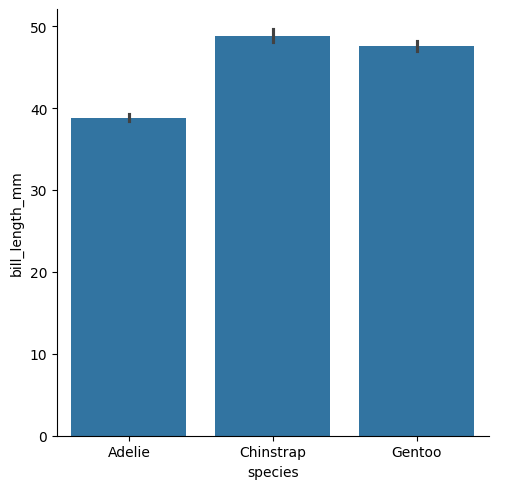

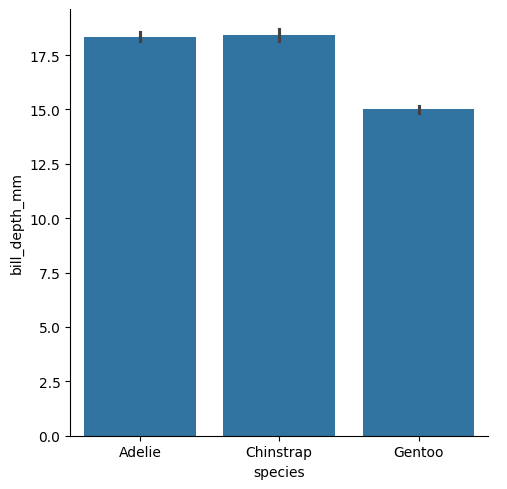

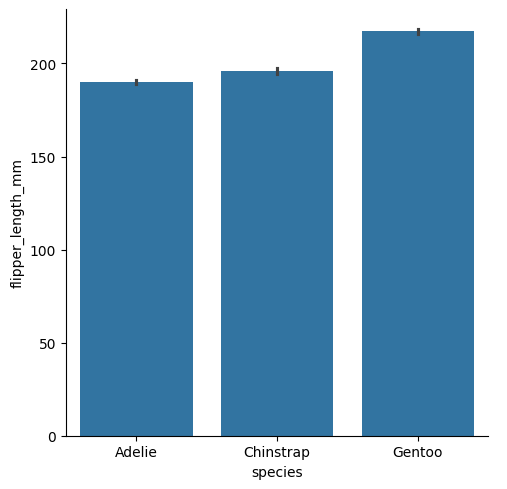

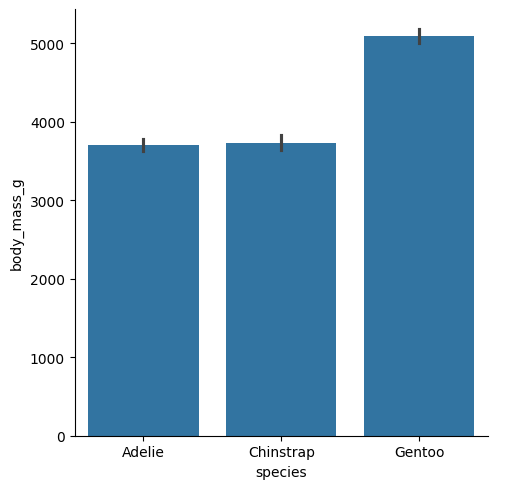

In [23]:
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_depth_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'flipper_length_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'body_mass_g', data=df)

In plaats van de naar gemiddelden te kijken, kunnen we ook kijken naar verdelingen. Dit geeft vaak meer inzicht.
- Voer onderstaande cel uit om een histogram te maken voor snavellengte.
- Beschrijf in je eigen woorden wat je hieruit opmaakt.

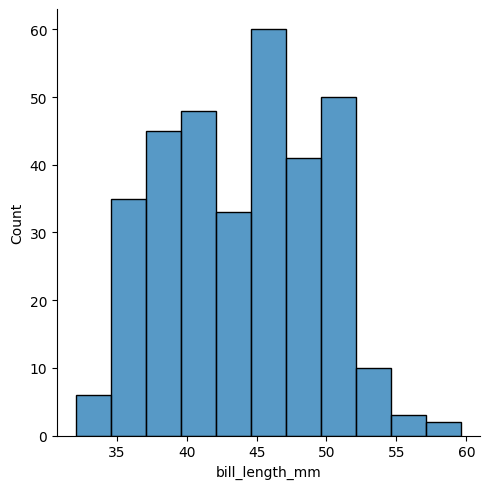

In [24]:
sns.displot(df, x='bill_length_mm', fill=True)

- Voer onderstaande cel uit om een histogram te maken van de snavellengte per soort.
- Beschrijf in je eigen woorden wat je hieruit opmaakt.

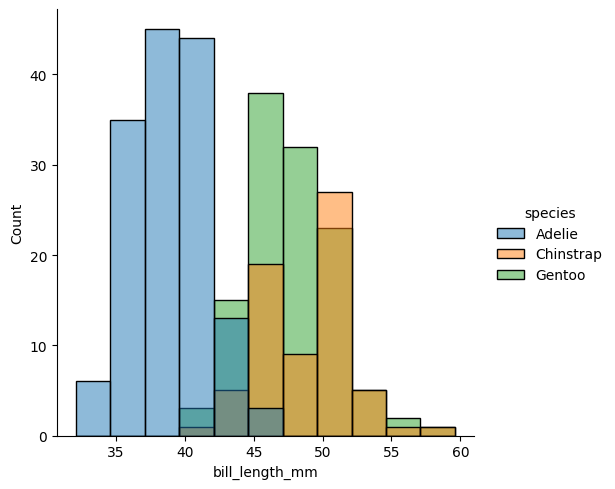

In [25]:
sns.displot(df, x='bill_length_mm', hue="species", fill=True)

- Voer onderstaande cel uit om verdelingen te zien in plaats van een histogram.
- Welke van de 4 kenmerken is het meest geschikt om onderscheid te maken tussen de verschillende soorten? Leg uit waarom.

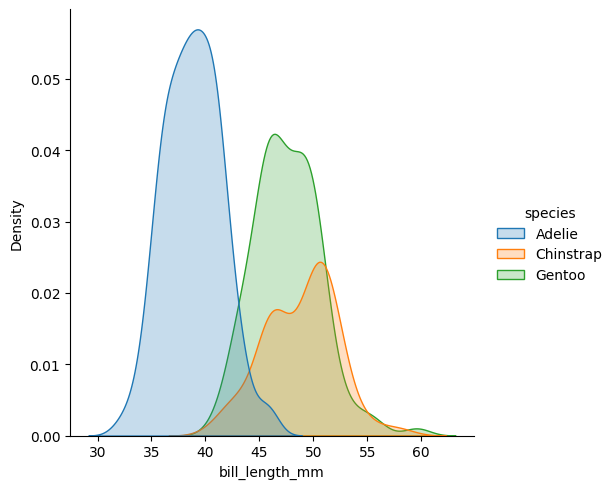

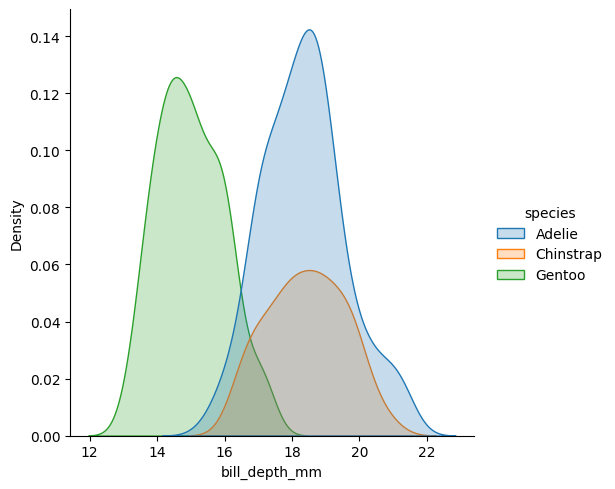

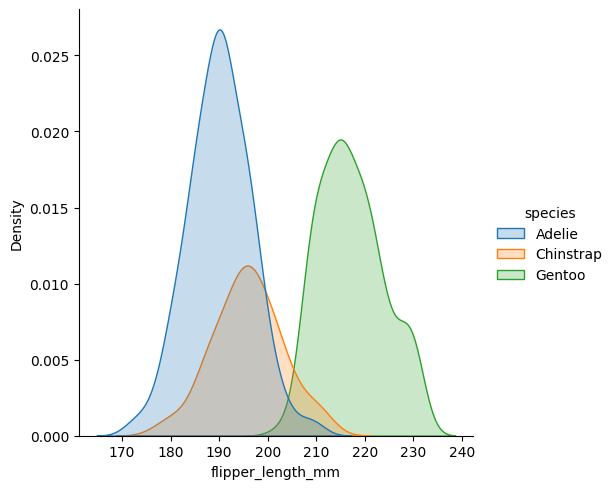

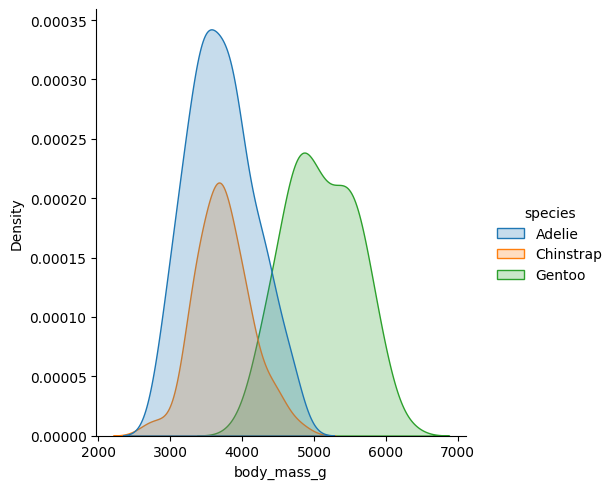

In [26]:
sns.displot(df, x='bill_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='bill_depth_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='flipper_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='body_mass_g', hue="species", kind="kde", fill=True)

## 2.3 Analyse niet-numerieke kenmerken
Naast de numerieke kenmerken kunnen ook niet-numerieke (categoriale) kenmerken van belang zijn.
- Voer onderstaande cel uit. Beschrijf in je eigen woorden welke informatie je in deze grafieken vindt, die nuttig is voor het voorspellen van de pinguinsoort?

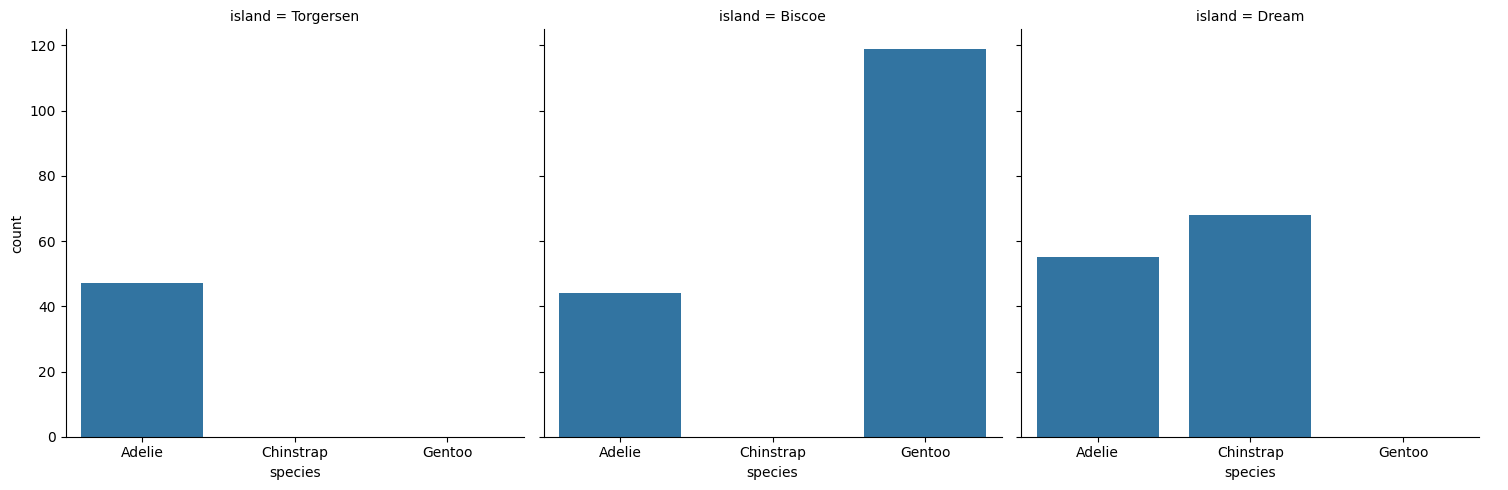

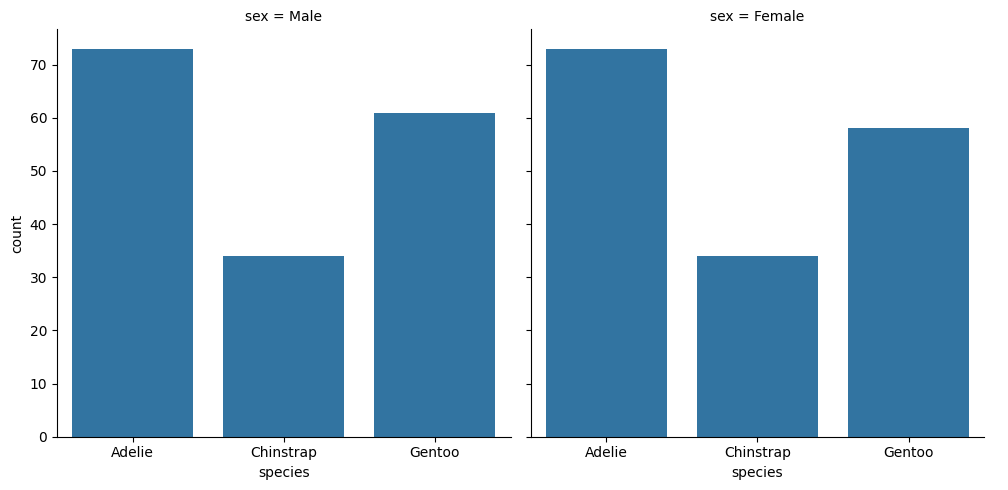

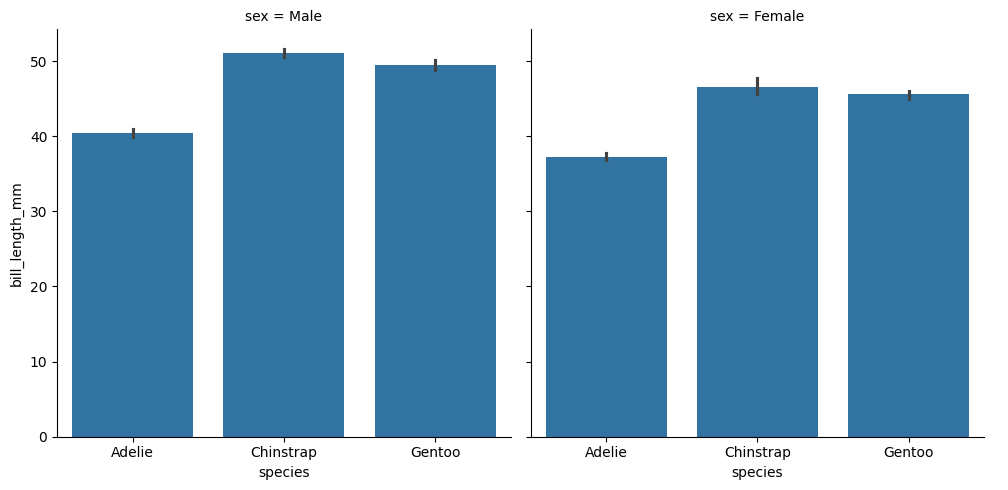

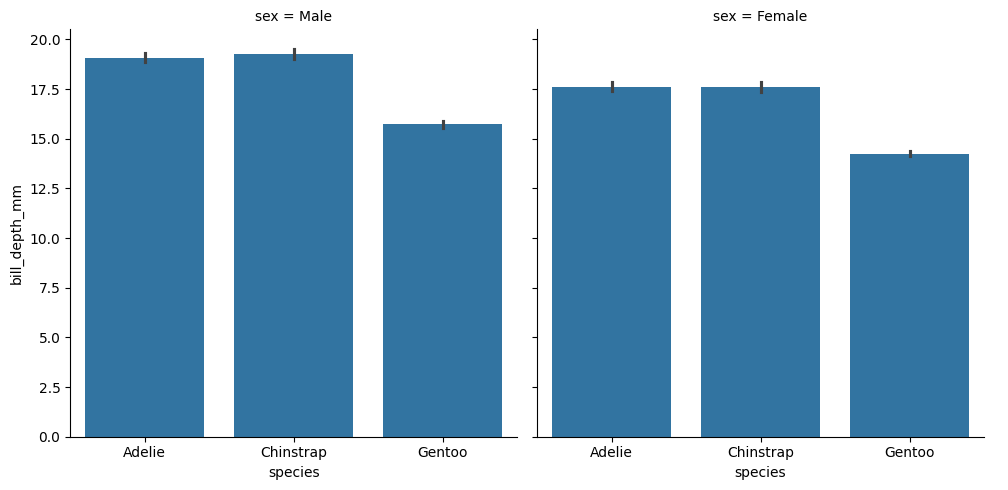

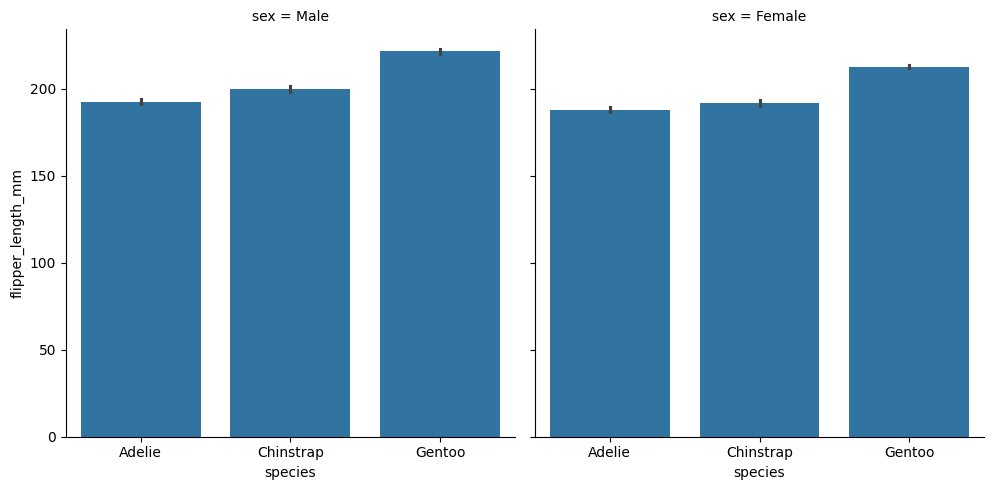

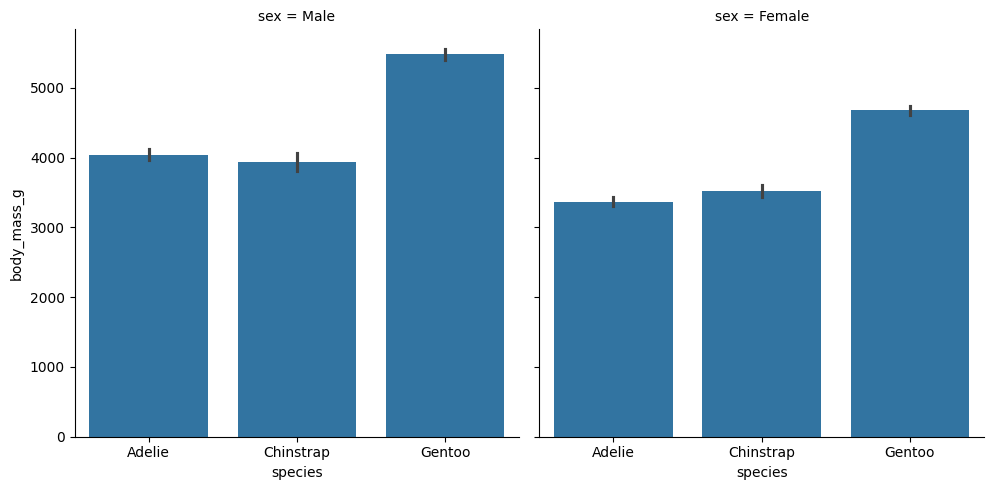

In [27]:
sns.catplot(kind = 'count', x = 'species', col = 'island', data=df)
sns.catplot(kind = 'count', x = 'species', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_depth_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'flipper_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'body_mass_g', col = 'sex', data=df)

# 3 Voorspellen van de pinguinsoort

### 3.1 Omzetten naar numeriek
Machine Learning modellen kunnen niet omgaan met tekst. We moeten daarom de teksten omzetten in getallen.
- Voer onderstaande cel uit. De eventuele waarschuwing die je krijgt kun je negeren.
- Bekijk het df_dum dataframe en leg in je eigen woorden uit hoe de tekstkolommen zijn omgezet naar getallen.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dum = df.copy()
df_dum['species'] = le.fit_transform(df_dum['species'])

names = list(le.classes_)
df_dum = pd.get_dummies(df_dum, columns=['island', 'sex'])
display(df_dum)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,0,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,0,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,0,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,0,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,2,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,2,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,2,45.2,14.8,212.0,5200.0,True,False,False,True,False


## Splitsen in x-variabelen en y-variabele

- Met de x-variabelen proberen we de y-variabele zo goed mogelijk te voorspellen.
- X-variabelen: de kenmerken van pinguin (snavellengte etc.)
- y-variabele: de klasse die we willen voorspellen. In dit geval de soort pinguin (0, 1 of 2)
Voer onderstaande cel uit:
- Het resultaat bestaat uit twee dataframes. Wat doet de drop() functie?


In [29]:
X = df_dum.drop(['species'], axis=1)
y = df_dum[['species']]
display(X,y)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


,species
0,0
1,0
2,0
4,0
5,0
...,...
338,2
340,2
341,2
342,2


## Splitsen in training data en test data
- De training data gebruiken we om het model te trainen
- De test data gebruiken we om te bepalen hoe goed ons model kan voorspellen
Voer onderstaande cel uit.
- Welk percentage van de totale dataset gebruiken we om ons model te trainen?

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print('X_train:', 'Aantal rijen =' ,X_train.shape[0], ',','Aantal kolommen =', X_train.shape[1], )
print('y_train: ', 'Aantal rijen =', y_train.shape[0], ',','Aantal kolommen =', 1 )
print('X_test:', 'Aantal rijen =' ,X_test.shape[0], ',','Aantal kolommen =', X_test.shape[1], )
print('y_test: ', 'Aantal rijen =', y_test.shape[0], ',','Aantal kolommen =', 1 )


X_train: Aantal rijen = 249 , Aantal kolommen = 9
y_train:  Aantal rijen = 249 , Aantal kolommen = 1
X_test: Aantal rijen = 84 , Aantal kolommen = 9
y_test:  Aantal rijen = 84 , Aantal kolommen = 1


## Trainen van het model
- In dit geval maken we een beslisboom (decision tree)

In [31]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualisatie van het model
- Voer onderstaande cel uit.
- Leg uit hoe deze beslisboom werkt. Vul daarvoor deze tekst aan:
Als de flipperlengte kleiner dan of gelijk is aan ...... dan is de pinguinsoort waarschijnlijk ...... Er zijn ..... rijen (samples) die kleiner dan of gelijk zijn aan dit getal. Van deze rijen zijn er .... een Adelie, .... zijn een Chinstrap en .... zijn een Gento.



In [32]:
fig = plt.figure(figsize=(140,60))
_ = tree_plt.plot_tree(tree,
                   feature_names=X.columns,
                   class_names=names,
                   filled=True, impurity = 'True', fontsize = 60)

InvalidParameterError: The 'impurity' parameter of plot_tree must be an instance of 'bool' or an instance of 'numpy.bool'. Got 'True' instead.

<Figure size 14000x6000 with 0 Axes>

## Voorspellen met de getrainde beslisboom
We gebruiken de test data om te bepalen hoe goed ons model is
- Voer onderstaande cel uit om de voorspellingen en de werkelijkheid te zien.
- In de eerste regel van de voorspellingen vind je een waarde die afwijkt van de werkelijkheid. Wat is deze voorspelde waarde en wat is de werkelijke waarde?

In [ ]:
predictions = tree.predict(X_test)
display('Onze voorspellingen:', predictions[:])
display('De werkelijkheid:', np.array(y_test['species']))
print("Percentage juist voorspeld: {:.2f} ".format( tree.score(X_test, y_test)*100))

## Analyseren van de voorspellingen
- Voer onderstaande cel uit
- Bestudeer de 'confusion matrix'. Hoeveel voorspellingen zijn onjuist. Wat was de voorspelde soort en wat was de werkelijke soort van deze voorspellingen?

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=names)
disp.plot()
plt.show()